In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\250.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\251.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\252.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\253.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\254.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\255.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\256.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\257.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\258.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\259.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\260.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\261.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\262.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test\0\263.jpg
C:/Users/user/Desktop/Cat vs Dog Classifier/dogv

In [24]:
train_dir = 'C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/train'
test_dir = 'C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/test'

In [25]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [32]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,validation_data=test_generator,validation_steps=test_generator.samples//20)

Epoch 1/10


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 578ms/step - accuracy: 0.4948 - loss: 0.8712 - val_accuracy: 0.4500 - val_loss: 0.6910
Epoch 2/10


C:\Users\user\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6905
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 438ms/step - accuracy: 0.4860 - loss: 0.6934 - val_accuracy: 0.5750 - val_loss: 0.6884
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6823
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 495ms/step - accuracy: 0.5532 - loss: 0.6993 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - accuracy: 0.5748 - loss: 0.7020 - val_accuracy: 0.5500 - val_loss: 0.6925
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6786
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 469ms/step - accuracy: 0.6126 - loss: 0.6712 -

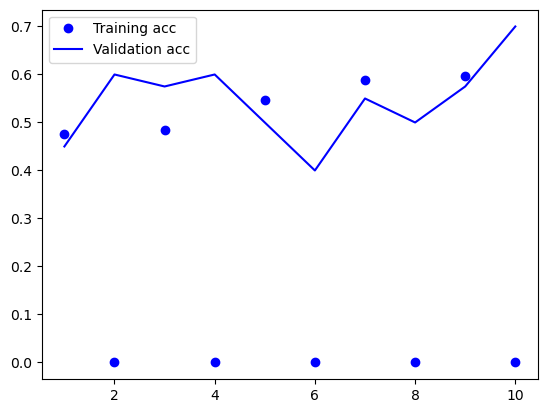

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

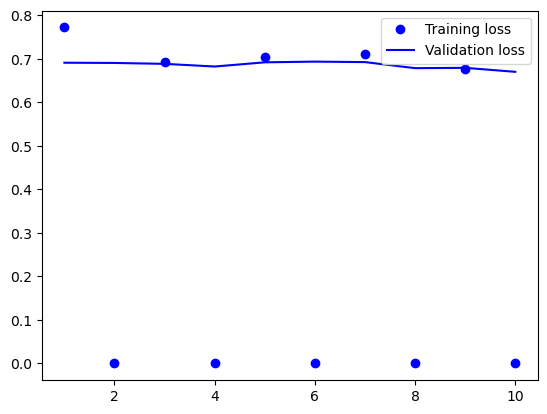

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [35]:
model.save('catvsdog.h5')

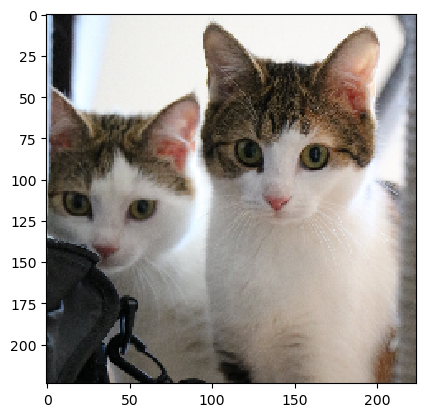

In [37]:
from tensorflow.keras.preprocessing import image
path ='C:/Users/user/Desktop/Cat vs Dog Classifier/dogvscat/train/0/109.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [38]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [39]:
img_array=img_array.reshape(1,224,224,3)

In [40]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
dog
